In [1]:
import pandas as pd

### About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
     Sales -- Unit sales (in thousands) at each location
     Competitor Price -- Price charged by competitor at each location
     Income -- Community income level (in thousands of dollars)
     Advertising -- Local advertising budget for company at each location (in thousands of dollars)
     Population -- Population size in region (in thousands)
     Price -- Price company charges for car seats at each site
     Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
     Age -- Average age of the local population
     Education -- Education level at each location
     Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
     US -- A factor with levels No and Yes to indicate whether the store is in the US or not
    The company dataset looks like this: 
 
### Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


# EDA

In [2]:
rawData = pd.read_csv('Company_Data.csv') # Read the file
rawData.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
from matplotlib import pyplot as plt

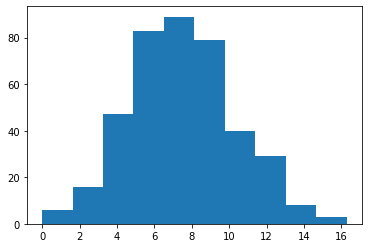

In [4]:
plt.hist(x=rawData.Sales,bins=10) # check the distribution of the target variable. even if we need to clasify we need to refer.
plt.show()

In [5]:
rawData.info() # check null values and shape and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
for col in rawData.columns:                 ## checking the unique values in categorical variables.
#     print(col,rawData[col].dtype,'\n')
    if rawData[col].dtype == object:
        print(rawData[col].dtype)
        print(rawData[col].value_counts())
    else:
        pass

object
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
object
Yes    282
No     118
Name: Urban, dtype: int64
object
Yes    258
No     142
Name: US, dtype: int64


In [7]:
data = rawData.copy(deep=True) # making a copy of rawdata for further processing

In [8]:
temp = rawData.ShelveLoc.map({'Bad':0,'Medium':1,'Good':2}) # labeling shelveLoc as it is a ordinal data. label encloder will 
data.head()                                                 # asign values based on alphbets but i wanted logical order.

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
data = pd.concat([rawData.drop(columns='ShelveLoc'),temp],axis=1) ## adding the labled shelveloc column to the dataset
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc
0,9.50,138,73,11,276,120,42,17,Yes,Yes,0
1,11.22,111,48,16,260,83,65,10,Yes,Yes,2
2,10.06,113,35,10,269,80,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,55,14,Yes,Yes,1
4,4.15,141,64,3,340,128,38,13,Yes,No,0


In [10]:
data = pd.get_dummies(data) ## dummi encoding for rest of dataset
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,2,0,1,0,1
2,10.06,113,35,10,269,80,59,12,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,0,0,1,1,0


In [11]:
Y = data.Sales.values ## using the sales values as flot for regressor tree
Y

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [12]:
X = data.iloc[:,1:].values # taking values of independent variables for model building
X

array([[138,  73,  11, ...,   1,   0,   1],
       [111,  48,  16, ...,   1,   0,   1],
       [113,  35,  10, ...,   1,   0,   1],
       ...,
       [162,  26,  12, ...,   1,   0,   1],
       [100,  79,   7, ...,   1,   0,   1],
       [134,  37,   0, ...,   1,   0,   1]], dtype=int64)

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [14]:
## Train test split @ 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state = 0)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(320, 12) (80, 12)
(320,) (80,)


# DecisionTreeRegressor

    as the target feature is continuous data type tried to use regressor to see the high sales

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
dtrm = DecisionTreeRegressor(max_depth=4) # regressor tree class initiation

In [17]:
dtrm.fit(x_train,y_train) ## fitting the dataset on regressor tree

DecisionTreeRegressor(max_depth=4)

[Text(1674.0, 978.48, 'ShelveLoc <= 1.5\nmse = 8.188\nsamples = 100.0%\nvalue = 7.409'),
 Text(837.0, 761.0400000000001, 'Price <= 106.5\nmse = 6.223\nsamples = 80.0%\nvalue = 6.741'),
 Text(418.5, 543.6, 'Age <= 54.5\nmse = 5.266\nsamples = 28.4%\nvalue = 8.191'),
 Text(209.25, 326.1600000000001, 'ShelveLoc <= 0.5\nmse = 3.931\nsamples = 11.9%\nvalue = 9.55'),
 Text(104.625, 108.72000000000003, 'mse = 2.976\nsamples = 3.1%\nvalue = 7.91'),
 Text(313.875, 108.72000000000003, 'mse = 2.968\nsamples = 8.8%\nvalue = 10.135'),
 Text(627.75, 326.1600000000001, 'ShelveLoc <= 0.5\nmse = 3.951\nsamples = 16.6%\nvalue = 7.217'),
 Text(523.125, 108.72000000000003, 'mse = 3.802\nsamples = 5.3%\nvalue = 5.768'),
 Text(732.375, 108.72000000000003, 'mse = 2.561\nsamples = 11.2%\nvalue = 7.901'),
 Text(1255.5, 543.6, 'ShelveLoc <= 0.5\nmse = 4.952\nsamples = 51.6%\nvalue = 5.941'),
 Text(1046.25, 326.1600000000001, 'Population <= 196.5\nmse = 4.046\nsamples = 15.9%\nvalue = 4.567'),
 Text(941.625, 108

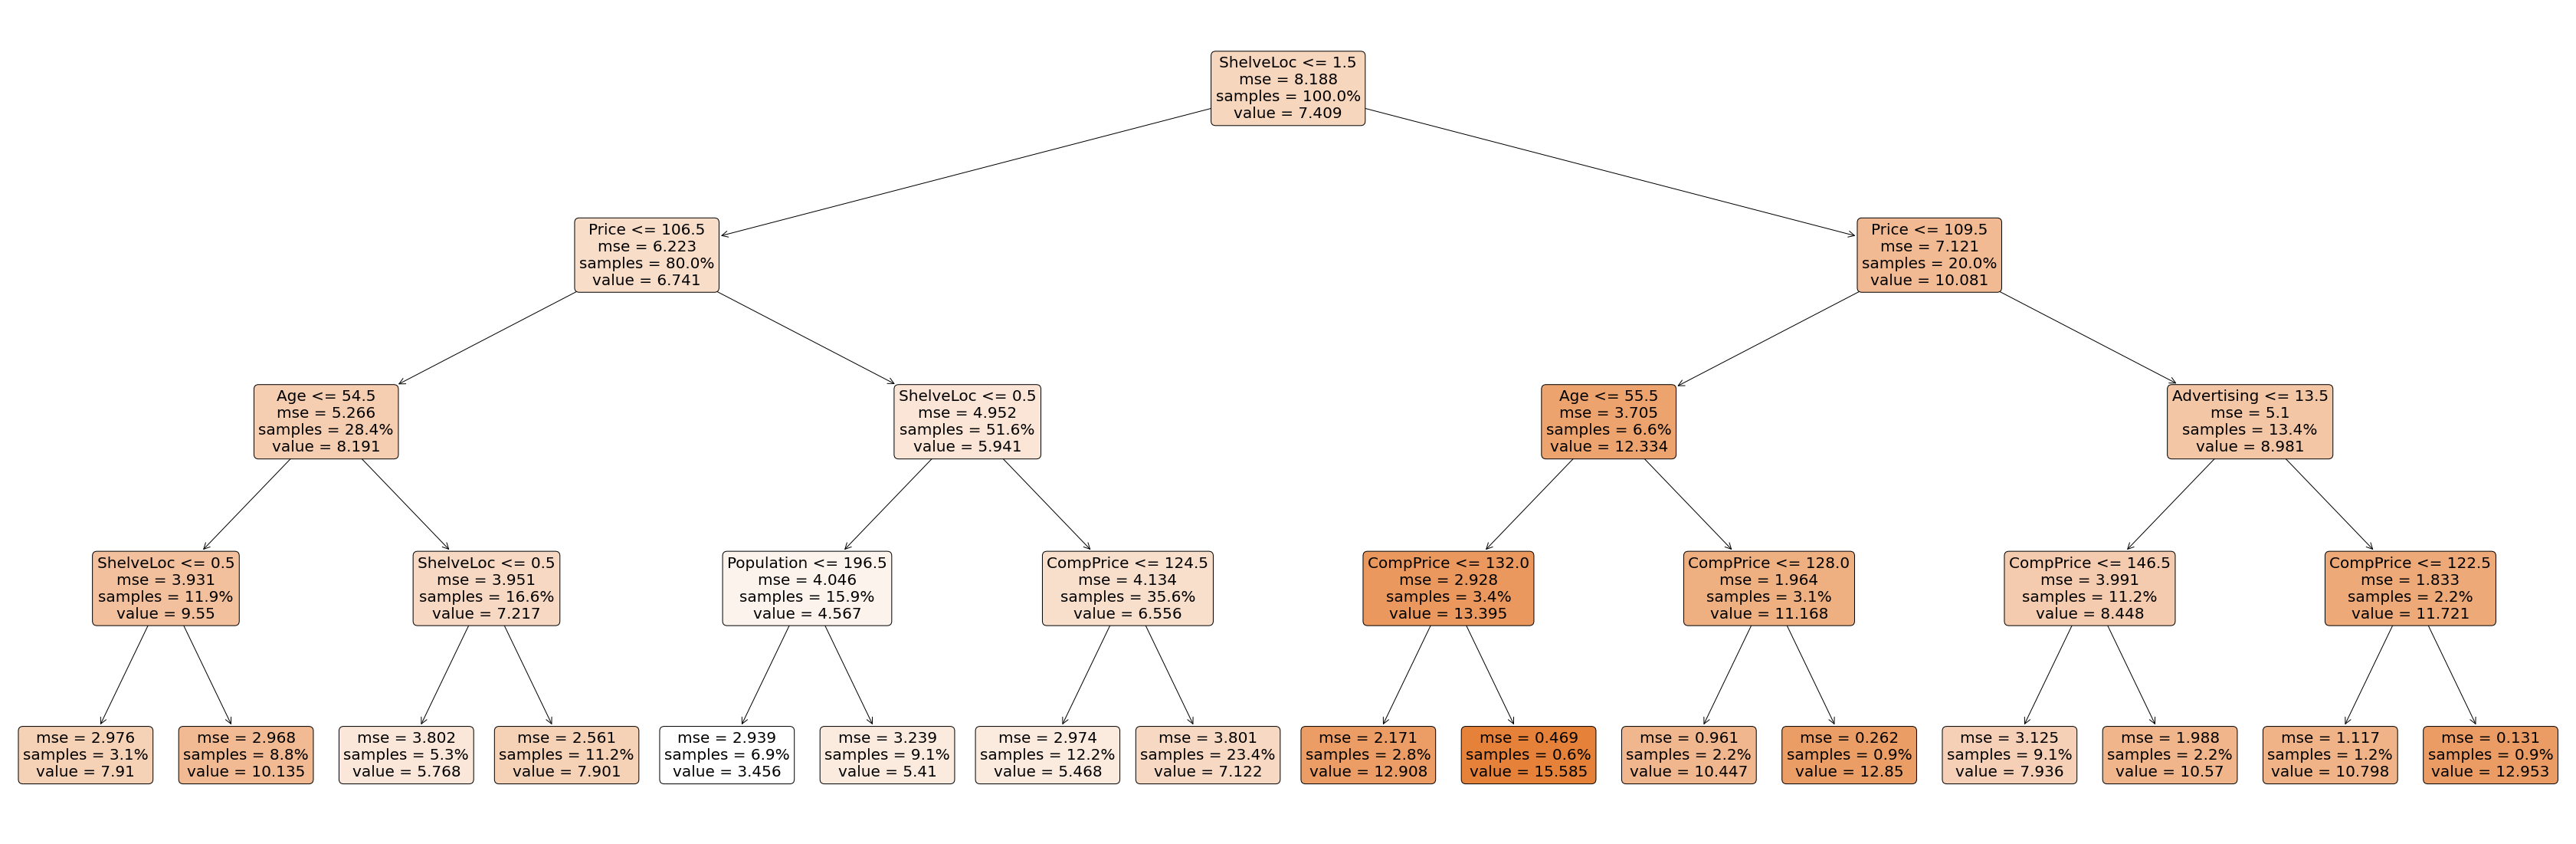

In [18]:
plt.figure(figsize=(60,20))
tree.plot_tree(dtrm,fontsize=20,label='all',
               feature_names=['CompPrice','Income','Advertising','Population','Price','Age',
                              'Education','ShelveLoc','Urban_No','Urban_Yes','US_No','US_Yes'],
               class_names='True',rounded=True,proportion=True,filled=True) ## plotting the tree

In [19]:
## plotting the text tree for analysis
text_representation = tree.export_text(dtrm)
print(text_representation)

|--- feature_7 <= 1.50
|   |--- feature_4 <= 106.50
|   |   |--- feature_5 <= 54.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- value: [7.91]
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- value: [10.14]
|   |   |--- feature_5 >  54.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- value: [5.77]
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- value: [7.90]
|   |--- feature_4 >  106.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_3 <= 196.50
|   |   |   |   |--- value: [3.46]
|   |   |   |--- feature_3 >  196.50
|   |   |   |   |--- value: [5.41]
|   |   |--- feature_7 >  0.50
|   |   |   |--- feature_0 <= 124.50
|   |   |   |   |--- value: [5.47]
|   |   |   |--- feature_0 >  124.50
|   |   |   |   |--- value: [7.12]
|--- feature_7 >  1.50
|   |--- feature_4 <= 109.50
|   |   |--- feature_5 <= 55.50
|   |   |   |--- feature_0 <= 132.00
|   |   |   |   |--- value: [12.91]
|   |   |   |--- feature_0 >  132.00
|   |   |   |   |--- value: [1

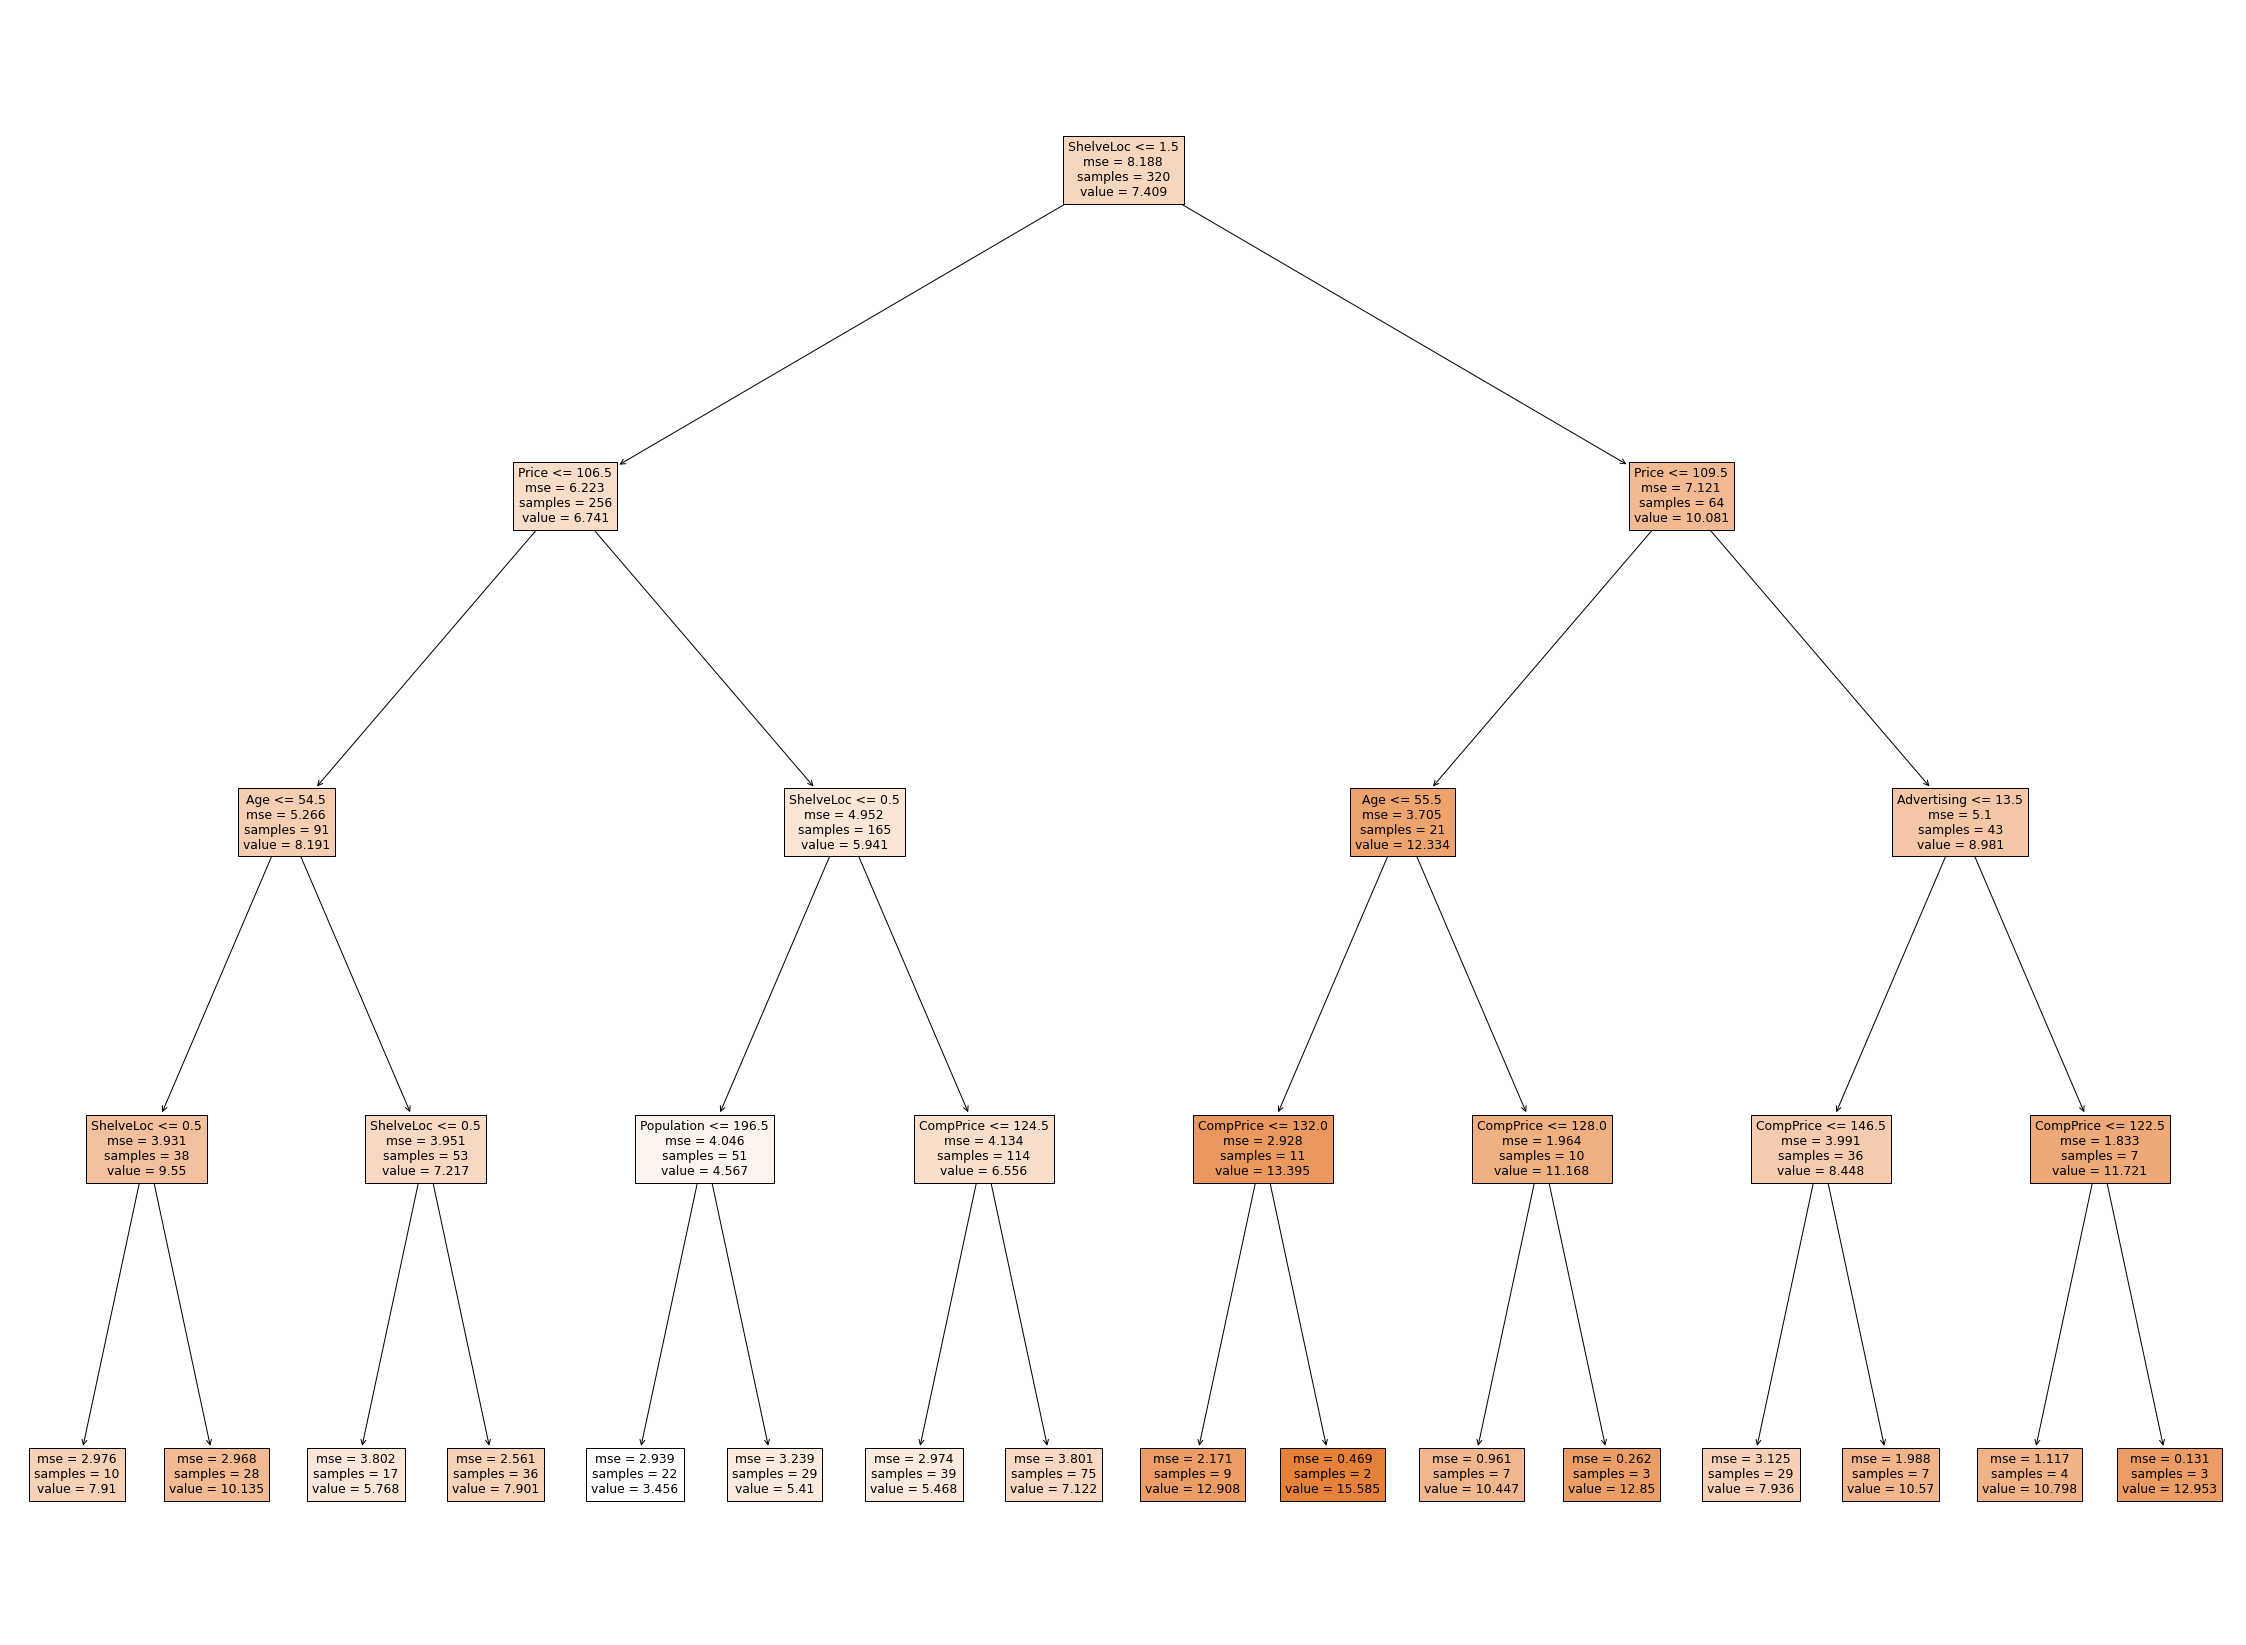

In [20]:
# plotting the tree with our lables for convinient reading and interpretation. PLEASE OPEN IN A NEW WINDOW.

fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc',
    'Urban_No','Urban_Yes','US_No','US_Yes']

fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(dtrm, 
                   feature_names=fn,
                   filled=True)

**Regression tree is not that helpful in clearly identifying high sales. However, SelveLoc and price see to be important features.**

### let us try using decision tree classifier
    

# DecisionTreeClassifier using Entropy (C5.0) (3 class classification)

    We first need to convert sales in to categoty. since there are 366 unique values in the column we can not simply convert it into a category variable. Hence, we shall categorize less than 5 between 5 to 10 and above 10

In [21]:
sales = data.Sales.copy(deep=True) # COPYING THE SALES FEATURE FOR MARKING AS CATEGORY

In [22]:
for i in range(len(sales)):               #classifying less than 5 as 'low', between 5 to 10 as 'medium' and above 10 as 'high'
    if sales[i] <= 5:
        sales[i] = 'low'
    elif (sales[i] > 5) & (sales[i] <= 10):
        sales[i] = 'medium'
    else:
        sales[i] = 'high'

In [23]:
sales.head() # checking the labeling

0    medium
1      high
2      high
3    medium
4       low
Name: Sales, dtype: object

In [24]:
sales.value_counts()

medium    245
high       78
low        77
Name: Sales, dtype: int64

In [25]:
Y = sales.values # creating the Y variable for model building
Y[0:10]

array(['medium', 'high', 'high', 'medium', 'low', 'high', 'medium',
       'high', 'medium', 'low'], dtype=object)

In [26]:
X = data.iloc[:,1:].values # creating X matrix for model building
X

array([[138,  73,  11, ...,   1,   0,   1],
       [111,  48,  16, ...,   1,   0,   1],
       [113,  35,  10, ...,   1,   0,   1],
       ...,
       [162,  26,  12, ...,   1,   0,   1],
       [100,  79,   7, ...,   1,   0,   1],
       [134,  37,   0, ...,   1,   0,   1]], dtype=int64)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .2 , random_state = 0) # train test spilt
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(320, 12) (80, 12)
(320,) (80,)


In [28]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth = 4) # class initaion and fitting the data
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(1910.6517857142856, 978.48, 'ShelveLoc <= 1.5\nentropy = 1.345\nsamples = 100.0%\nvalue = [0.188, 0.197, 0.616]'),
 Text(1036.2857142857142, 761.0400000000001, 'Price <= 106.5\nentropy = 1.234\nsamples = 80.0%\nvalue = [0.105, 0.238, 0.656]'),
 Text(518.1428571428571, 543.6, 'Age <= 50.5\nentropy = 1.122\nsamples = 28.4%\nvalue = [0.22, 0.077, 0.703]'),
 Text(259.07142857142856, 326.1600000000001, 'Income <= 56.0\nentropy = 0.991\nsamples = 11.2%\nvalue = [0.444, 0.0, 0.556]'),
 Text(129.53571428571428, 108.72000000000003, 'entropy = 0.0\nsamples = 2.8%\nvalue = [0.0, 0.0, 1.0]'),
 Text(388.60714285714283, 108.72000000000003, 'entropy = 0.975\nsamples = 8.4%\nvalue = [0.593, 0.0, 0.407]'),
 Text(777.2142857142857, 326.1600000000001, 'ShelveLoc <= 0.5\nentropy = 0.911\nsamples = 17.2%\nvalue = [0.073, 0.127, 0.8]'),
 Text(647.6785714285713, 108.72000000000003, 'entropy = 0.937\nsamples = 5.3%\nvalue = [0.0, 0.353, 0.647]'),
 Text(906.75, 108.72000000000003, 'entropy = 0.657\nsampl

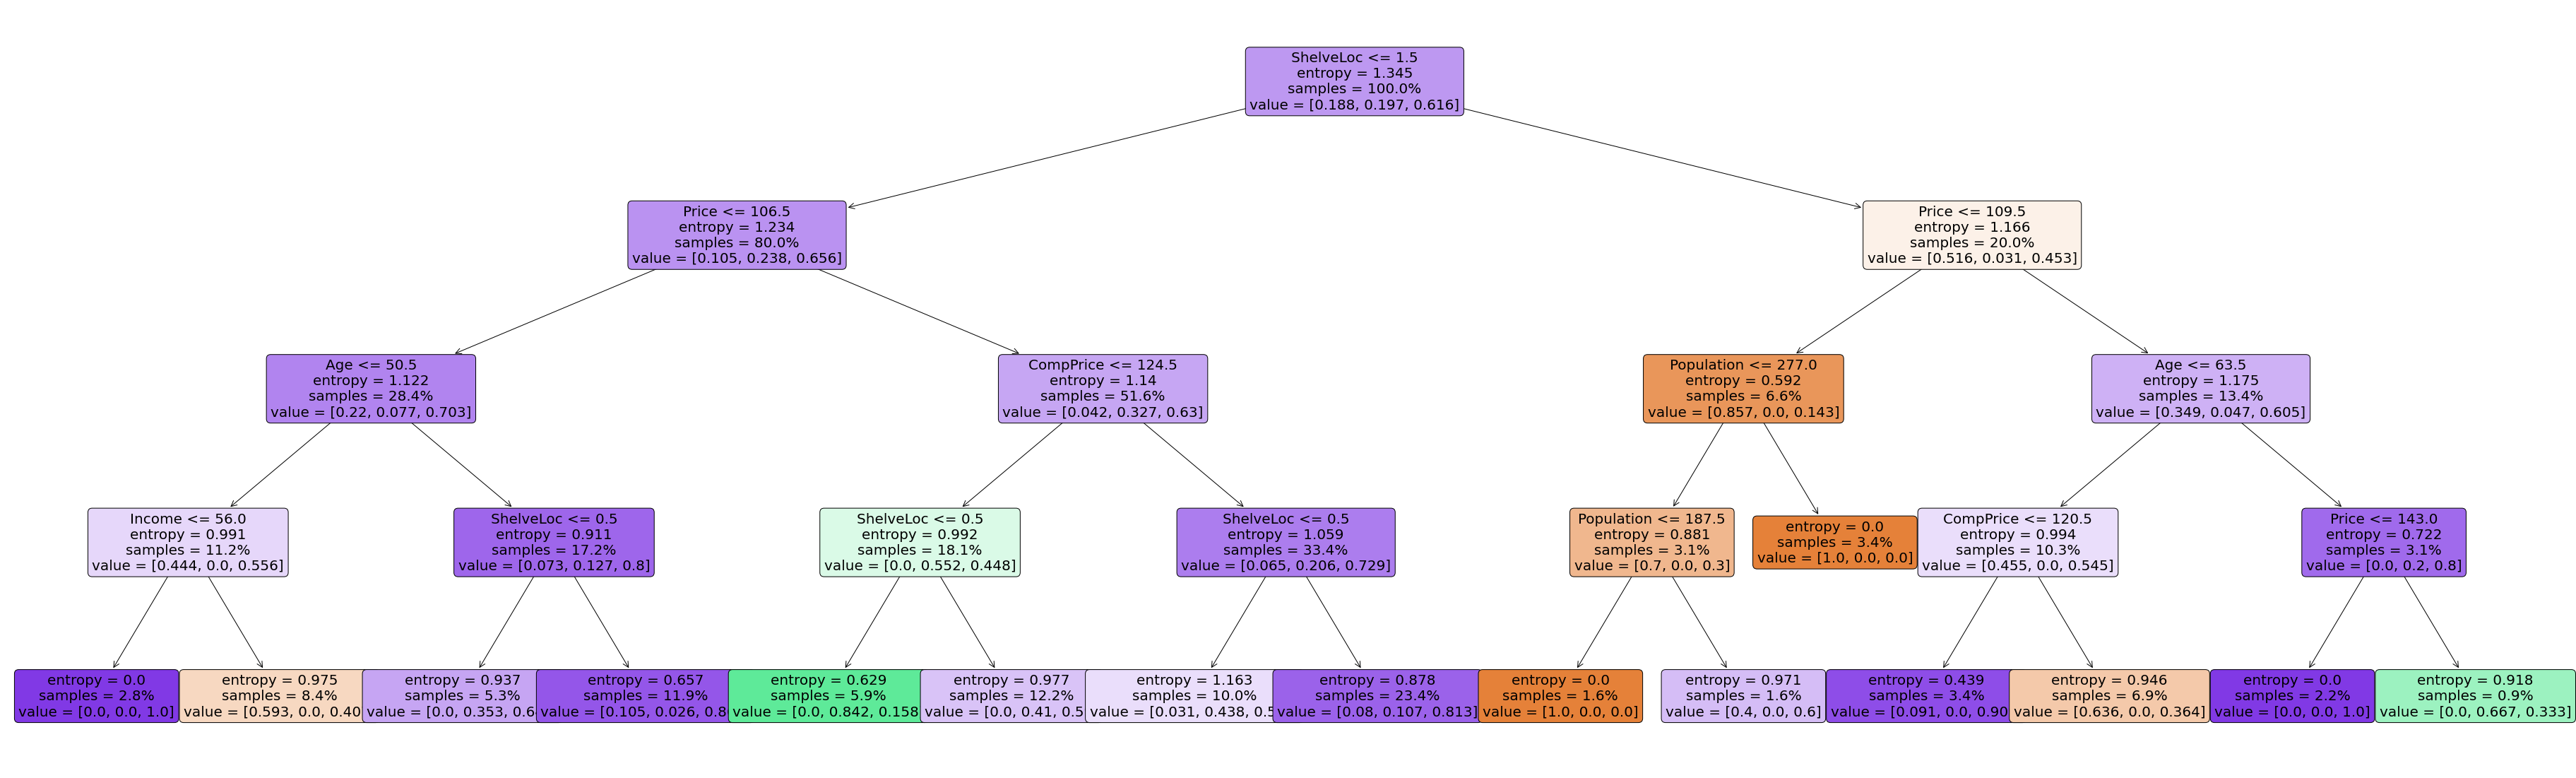

In [29]:
# PLOTTING THE TREE
plt.figure(figsize=(65,20))
tree.plot_tree(dtc,fontsize=20,label='all',
               feature_names=['CompPrice','Income','Advertising','Population','Price','Age',
                              'Education','ShelveLoc','Urban_No','Urban_Yes','US_No','US_Yes'],
               rounded=True,proportion=True,filled=True) # plotting the tree

In [30]:
text_representation = tree.export_text(dtc) # Plotting the text based tree
print(text_representation)

|--- feature_7 <= 1.50
|   |--- feature_4 <= 106.50
|   |   |--- feature_5 <= 50.50
|   |   |   |--- feature_1 <= 56.00
|   |   |   |   |--- class: medium
|   |   |   |--- feature_1 >  56.00
|   |   |   |   |--- class: high
|   |   |--- feature_5 >  50.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: medium
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: medium
|   |--- feature_4 >  106.50
|   |   |--- feature_0 <= 124.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: low
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: medium
|   |   |--- feature_0 >  124.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: medium
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: medium
|--- feature_7 >  1.50
|   |--- feature_4 <= 109.50
|   |   |--- feature_3 <= 277.00
|   |   |   |--- feature_3 <= 187.50
|   |   |   |   |--- class: high
|   |   |   |--- feature_3 >  187.50
|   |   |   |   |--- class: medium
|   |

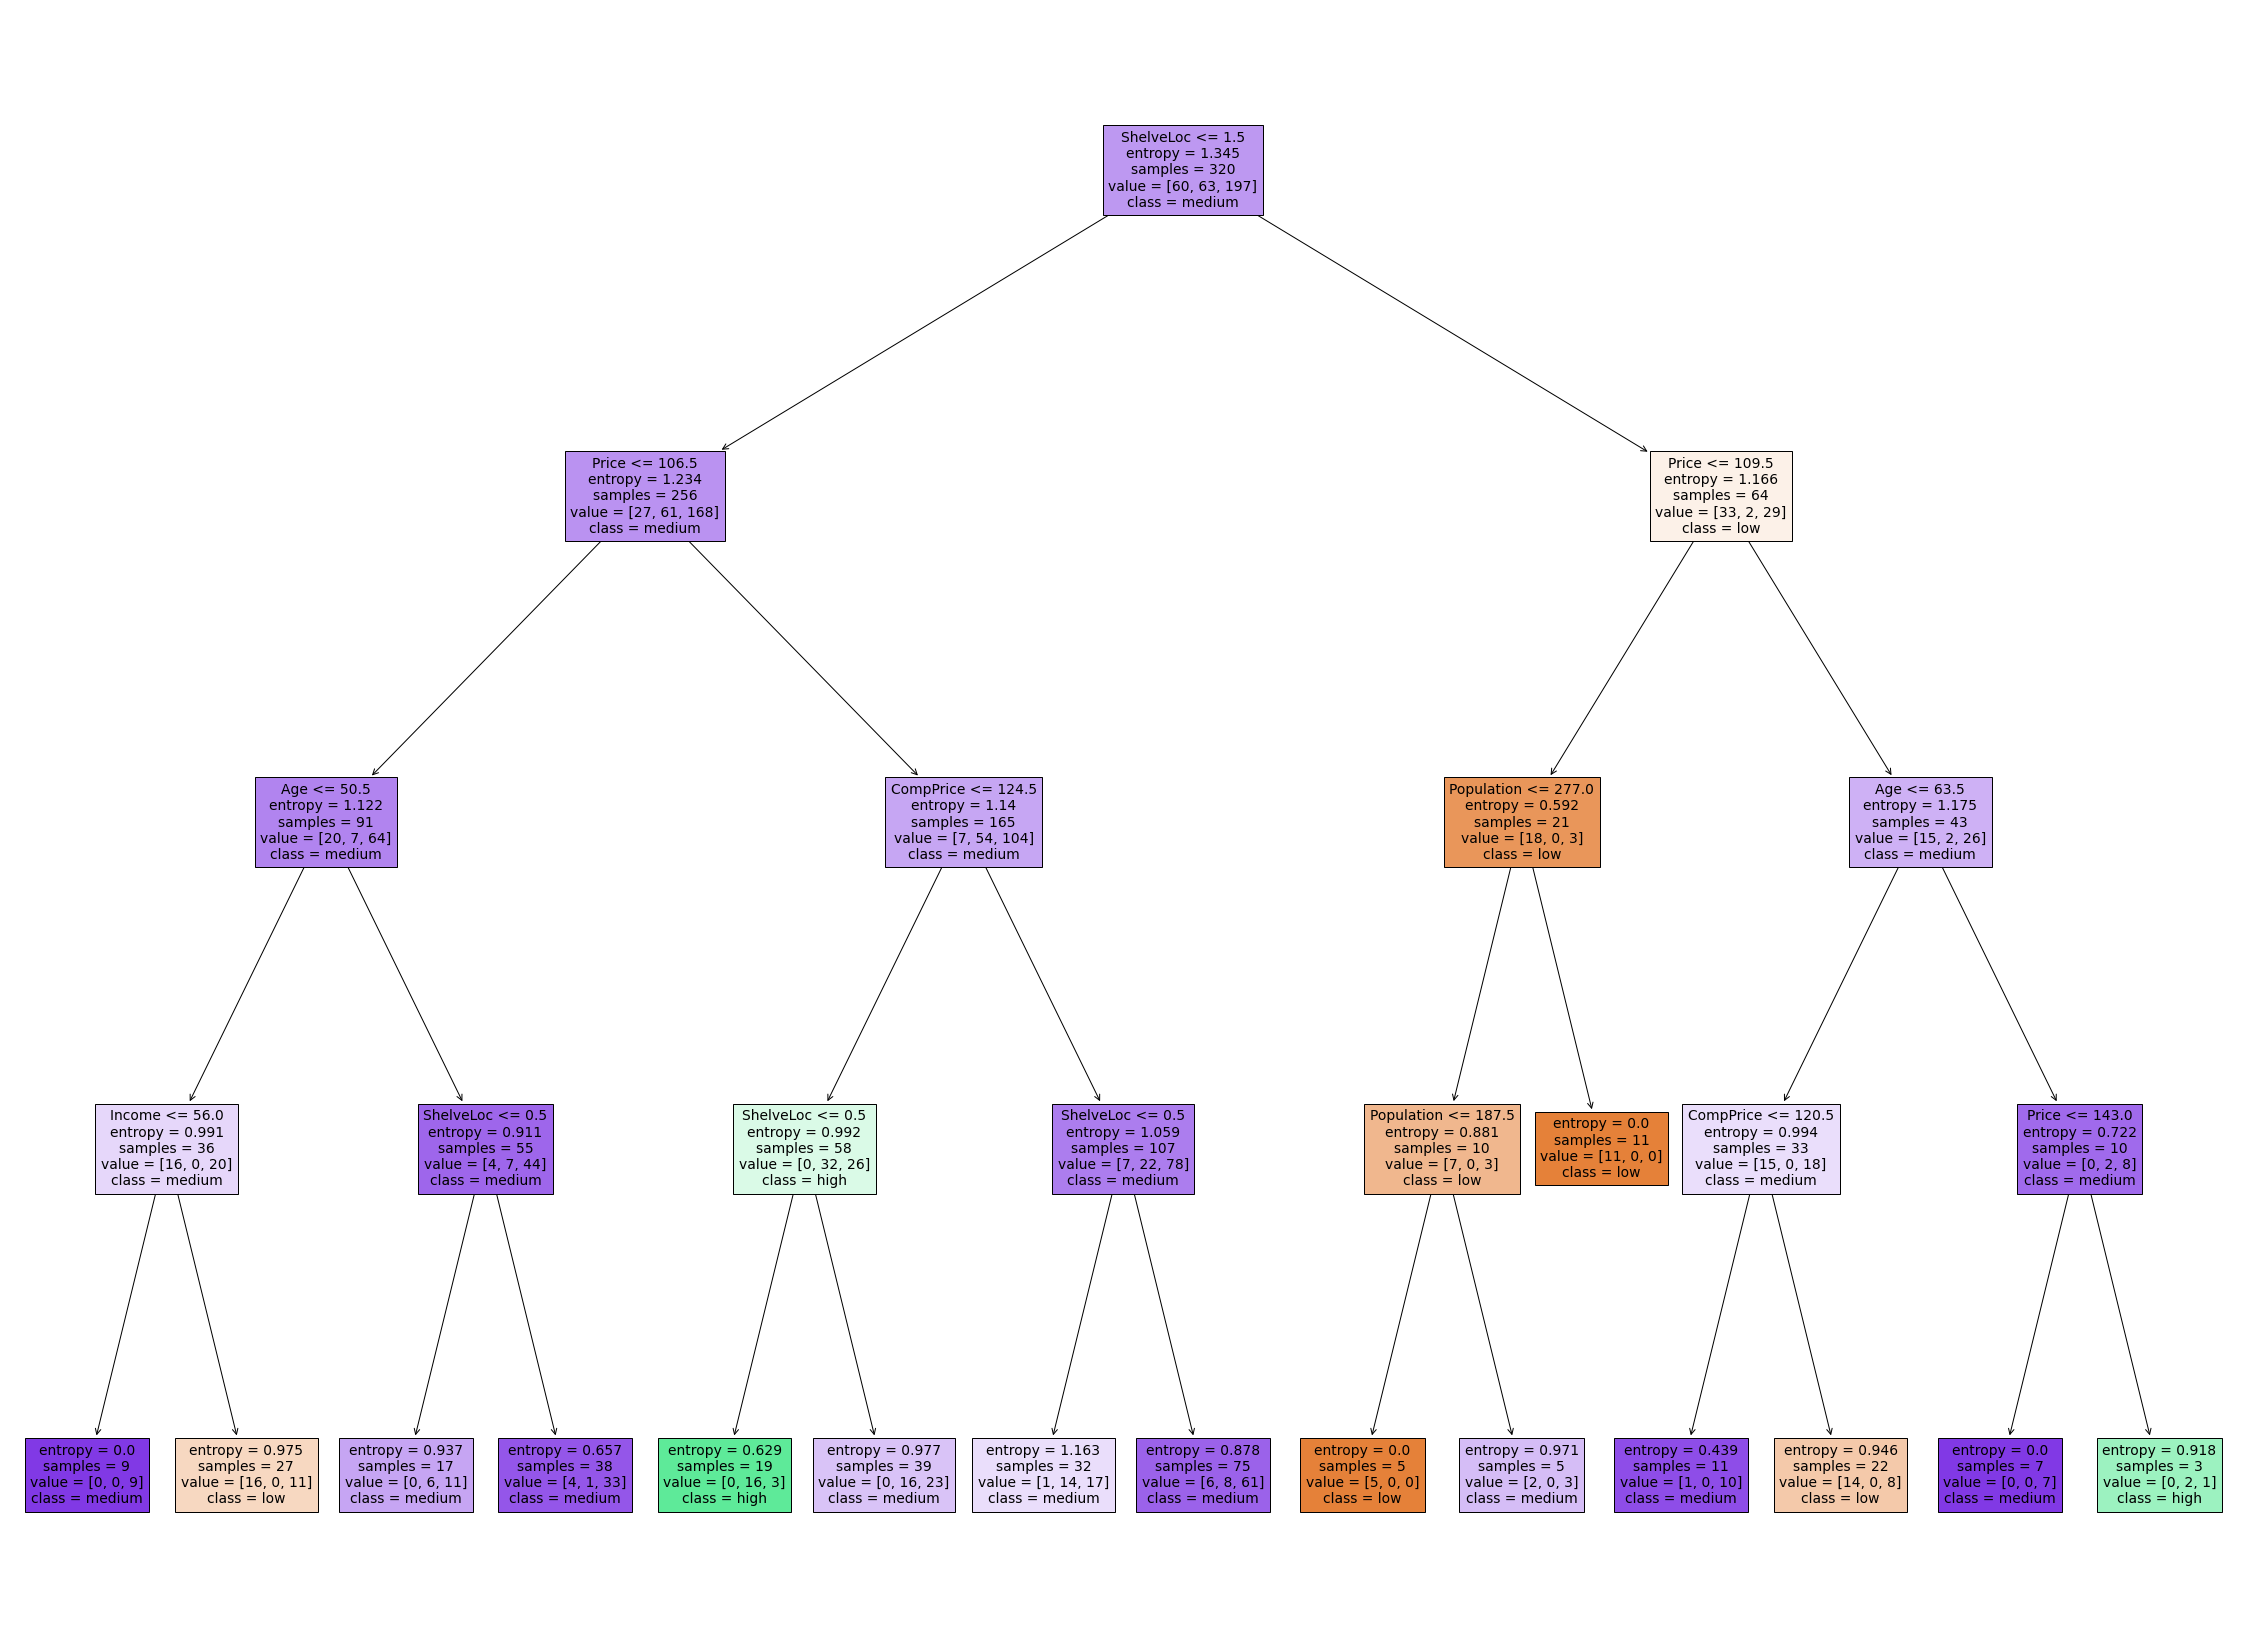

In [31]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc',
    'Urban_No','Urban_Yes','US_No','US_Yes']
cn=['low','high','medium']
fig = plt.figure(figsize=(40,30))                      ## Plotting the labled tree for better interpretation
_ = tree.plot_tree(dtc,                                ## Open in the new window
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)

# Conclusion 

## DecisionTreeClassifier (3 class classification)
    
    With the decision tree we can conclude that ShelfLoc, price, Compprice and age are playing major roll in high sales. as you follow the high sale from the root node you can see following fetures having high entropy and are used to classify the high sales category.

## DecisionTreeRegressor

    Even the regressor is suggesting the same features shelfLoc, price, compititor price, and age is determining the high sales. at any given locations.  

# DecisionTreeClassifier - Entropy (C5.0) (2 class Classification)

    Implementing decision tree classifier using only two classes in target variable. 
    
    sales less than 8      =   'low' and 
    sales greater than 8   =   'high'

In [32]:
sales = data.Sales.copy(deep=True) # COPYING THE SALES FEATURE FOR MARKING AS CATEGORY

In [33]:
for i in range(len(sales)):               #classifying less than or equal 8 as 'low', and above 8 as 'high'
    if sales[i] <= 7.49:
        sales[i] = 'low'
    else:
        sales[i] = 'high'

In [34]:
sales.head() # checking the labeling

0    high
1    high
2    high
3     low
4     low
Name: Sales, dtype: object

In [35]:
sales.value_counts() # value counts for each class

low     201
high    199
Name: Sales, dtype: int64

In [36]:
Y = sales.values # creating the Y variable for model building
Y[0:10]

array(['high', 'high', 'high', 'low', 'low', 'high', 'low', 'high', 'low',
       'low'], dtype=object)

In [37]:
X = data.iloc[:,1:].values # creating X matrix for model building
X

array([[138,  73,  11, ...,   1,   0,   1],
       [111,  48,  16, ...,   1,   0,   1],
       [113,  35,  10, ...,   1,   0,   1],
       ...,
       [162,  26,  12, ...,   1,   0,   1],
       [100,  79,   7, ...,   1,   0,   1],
       [134,  37,   0, ...,   1,   0,   1]], dtype=int64)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .2 , random_state = 0) # train test spilt
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(320, 12) (80, 12)
(320,) (80,)


In [39]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth = 4) # class initaion and fitting the data
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(1450.8, 1467.72, 'Price <= 105.5\nentropy = 0.999\nsamples = 100.0%\nvalue = [0.481, 0.519]\nclass = low'),
 Text(725.4, 1141.56, 'CompPrice <= 124.5\nentropy = 0.836\nsamples = 34.1%\nvalue = [0.734, 0.266]\nclass = high'),
 Text(544.05, 815.4000000000001, 'ShelveLoc <= 1.5\nentropy = 0.937\nsamples = 25.6%\nvalue = [0.646, 0.354]\nclass = high'),
 Text(362.7, 489.24, 'Age <= 68.5\nentropy = 0.987\nsamples = 20.9%\nvalue = [0.567, 0.433]\nclass = high'),
 Text(181.35, 163.08000000000015, 'entropy = 0.89\nsamples = 16.2%\nvalue = [0.692, 0.308]\nclass = high'),
 Text(544.05, 163.08000000000015, 'entropy = 0.567\nsamples = 4.7%\nvalue = [0.133, 0.867]\nclass = low'),
 Text(725.4, 489.24, 'entropy = 0.0\nsamples = 4.7%\nvalue = [1.0, 0.0]\nclass = high'),
 Text(906.75, 815.4000000000001, 'entropy = 0.0\nsamples = 8.4%\nvalue = [1.0, 0.0]\nclass = high'),
 Text(2176.2, 1141.56, 'ShelveLoc <= 1.5\nentropy = 0.935\nsamples = 65.9%\nvalue = [0.351, 0.649]\nclass = low'),
 Text(1450.8, 

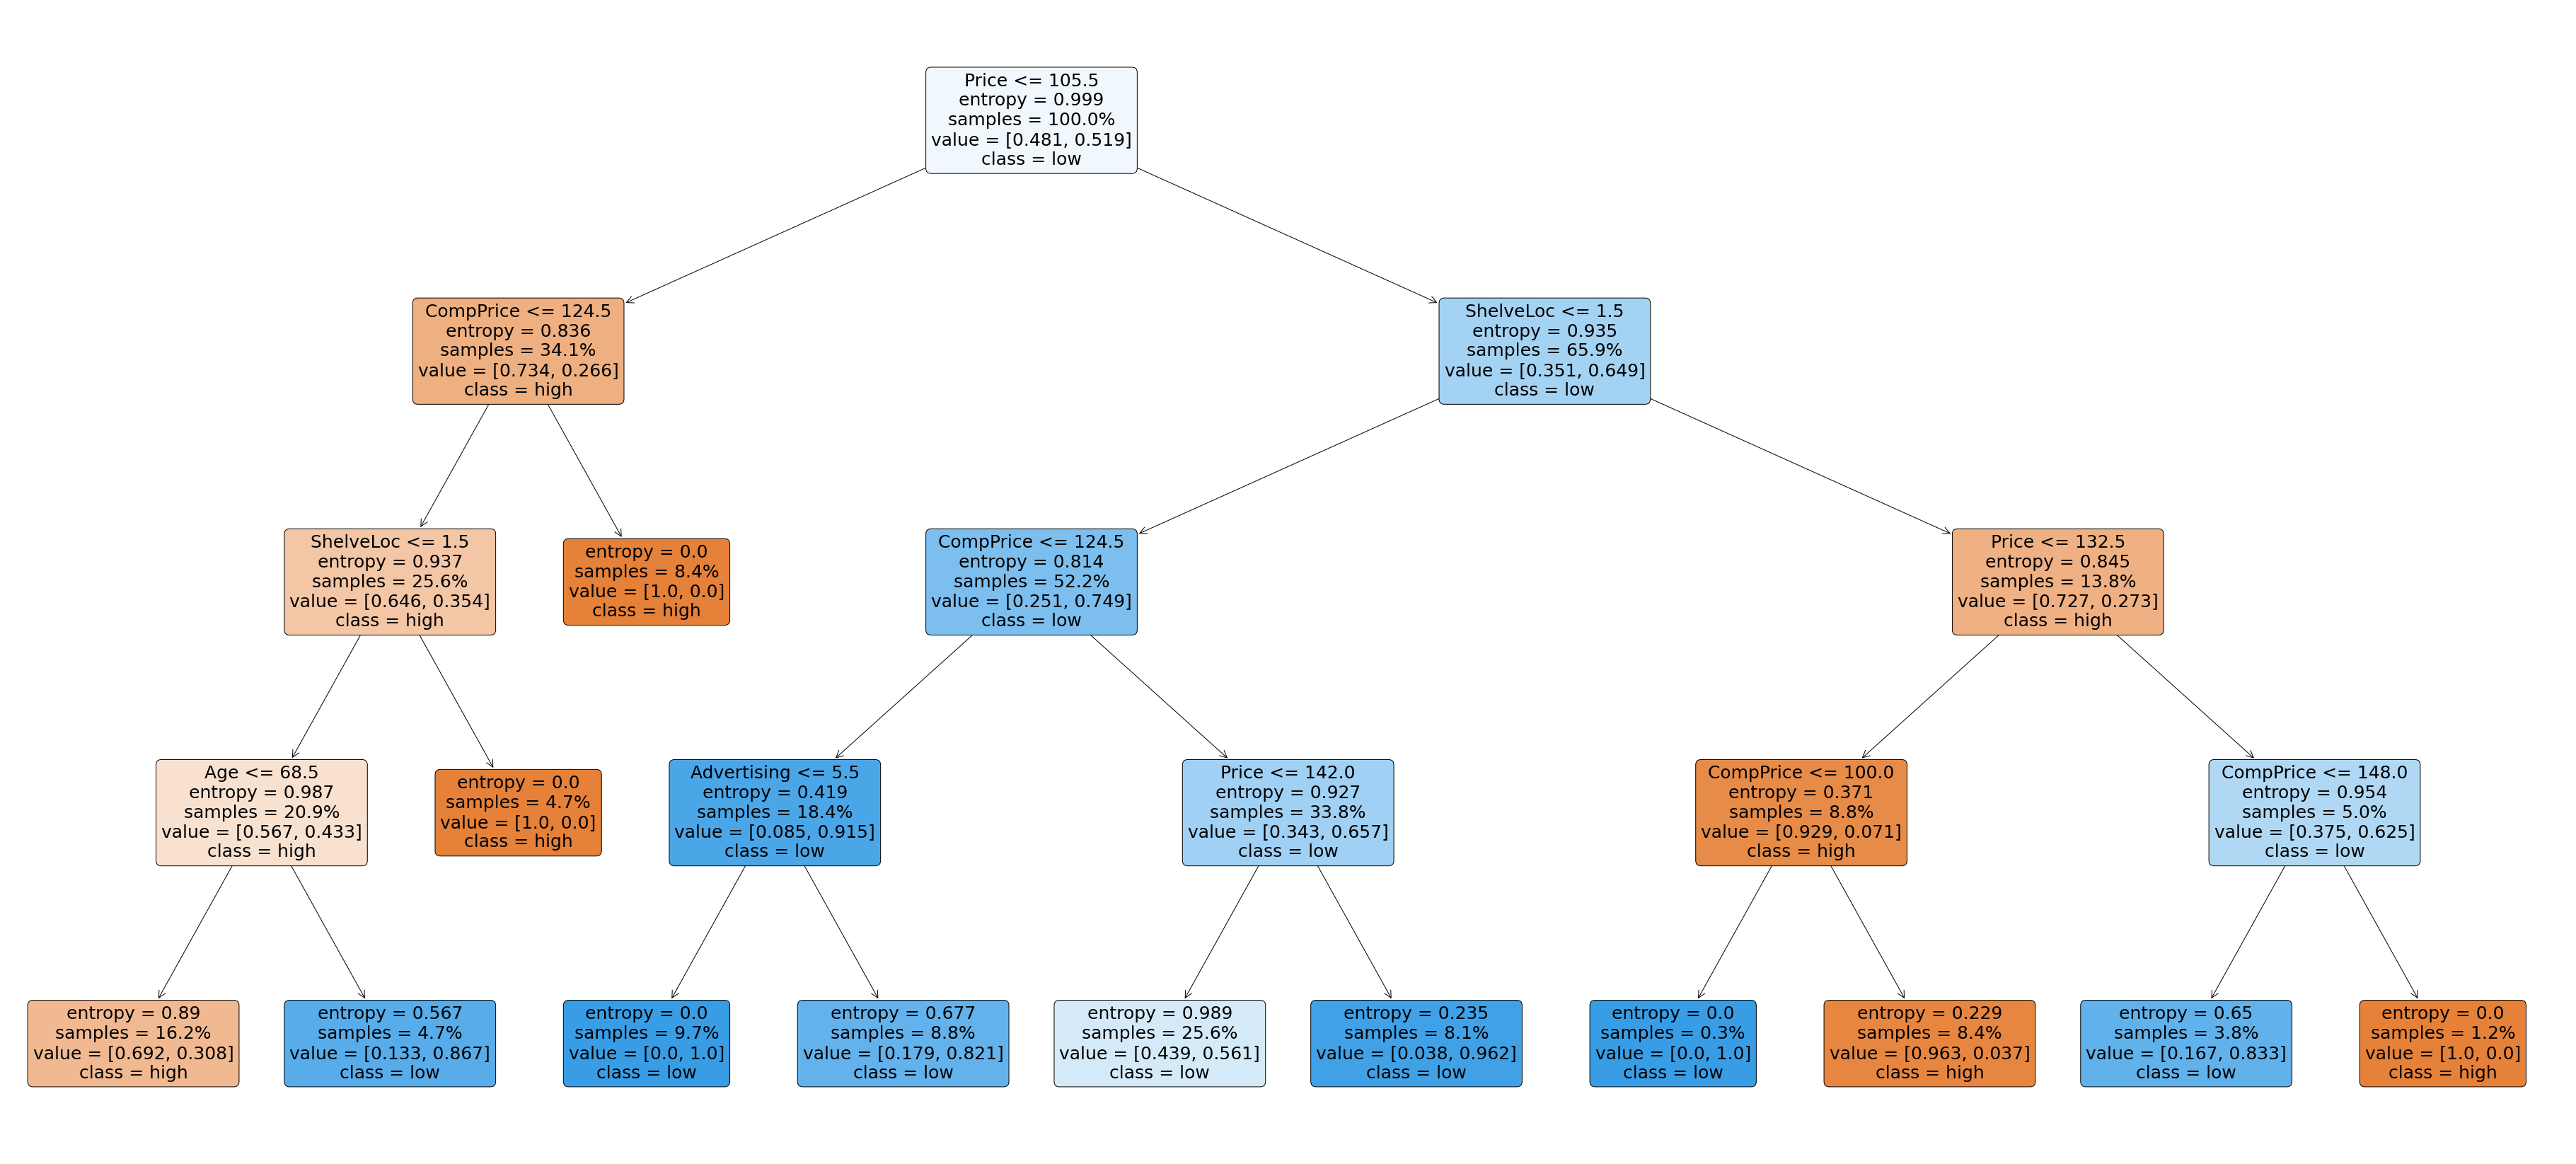

In [40]:
## PLOTTING THE TREE

plt.figure(figsize=(65,30))
tree.plot_tree(dtc,fontsize=25,label='all',
               feature_names=['CompPrice','Income','Advertising','Population','Price','Age',
                              'Education','ShelveLoc','Urban_No','Urban_Yes','US_No','US_Yes'],
               class_names=['high','low'],rounded=True,proportion=True,filled=True) # plotting the tree

In [41]:
# 'CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc','Urban_No','Urban_Yes','US_No','US_Yes'

text_representation = tree.export_text(dtc) # Plotting the text based tree
print(text_representation)

|--- feature_4 <= 105.50
|   |--- feature_0 <= 124.50
|   |   |--- feature_7 <= 1.50
|   |   |   |--- feature_5 <= 68.50
|   |   |   |   |--- class: high
|   |   |   |--- feature_5 >  68.50
|   |   |   |   |--- class: low
|   |   |--- feature_7 >  1.50
|   |   |   |--- class: high
|   |--- feature_0 >  124.50
|   |   |--- class: high
|--- feature_4 >  105.50
|   |--- feature_7 <= 1.50
|   |   |--- feature_0 <= 124.50
|   |   |   |--- feature_2 <= 5.50
|   |   |   |   |--- class: low
|   |   |   |--- feature_2 >  5.50
|   |   |   |   |--- class: low
|   |   |--- feature_0 >  124.50
|   |   |   |--- feature_4 <= 142.00
|   |   |   |   |--- class: low
|   |   |   |--- feature_4 >  142.00
|   |   |   |   |--- class: low
|   |--- feature_7 >  1.50
|   |   |--- feature_4 <= 132.50
|   |   |   |--- feature_0 <= 100.00
|   |   |   |   |--- class: low
|   |   |   |--- feature_0 >  100.00
|   |   |   |   |--- class: high
|   |   |--- feature_4 >  132.50
|   |   |   |--- feature_0 <= 148.00
|   |

In [42]:
# fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc',
#     'Urban_No','Urban_Yes','US_No','US_Yes']
# cn=['high','low']
# fig = plt.figure(figsize=(40,30))                      ## Plotting the labled tree for better interpretation
# _ = tree.plot_tree(dtc,                                ## Open in the new window
#                    feature_names=fn,  
#                    class_names=cn,
#                    filled=True)

In [43]:
## EXTRACTING FEATURE IMPORTANCE FROM THE TREE
dtc.feature_importances_

array([0.25542042, 0.        , 0.03971979, 0.        , 0.38558741,
       0.07823769, 0.        , 0.24103468, 0.        , 0.        ,
       0.        , 0.        ])

In [44]:
## PRINTING THE FEATURE IMPORTANCE WITH RESPECT TO THE FEATURE NAMES

a = [x for x in data.columns[1:]]
for i,b in enumerate(a):
    print(f'{b}             -  {(dtc.feature_importances_[i])*100:.2f} percent')

CompPrice             -  25.54 percent
Income             -  0.00 percent
Advertising             -  3.97 percent
Population             -  0.00 percent
Price             -  38.56 percent
Age             -  7.82 percent
Education             -  0.00 percent
ShelveLoc             -  24.10 percent
Urban_No             -  0.00 percent
Urban_Yes             -  0.00 percent
US_No             -  0.00 percent
US_Yes             -  0.00 percent


## feature importance in 2 class classification using entropy

    Looking above we can say that the shelveLoc and Price along with advertising contribute the most in determining the sales.
    
    However, it is extreamly difficult to determine what value of the feature is deterministic of high sale. meaning if price is lower we get higher sales else lower sale. or age less than 20 gives higher sale else not. suct inferencing is very difficult.

In [45]:
# PREDICTING THE LABLES FOR ACCURACY

pred = dtc.predict(x_test)
print(pd.Series(pred).value_counts())
pred

low     49
high    31
dtype: int64


array(['low', 'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'high', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'low', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'high', 'low', 'low', 'high', 'high', 'low',
       'low', 'high', 'low', 'high', 'high', 'low', 'low', 'high', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'high', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high'],
      dtype=object)

In [46]:
pd.crosstab(pred,y_test) ## ACCURACY IS NOT THAT GREAT

col_0,high,low
row_0,,
high,26,5
low,19,30


In [47]:
y_test

array(['high', 'high', 'low', 'low', 'low', 'high', 'high', 'low', 'low',
       'low', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'high', 'high', 'high', 'high', 'low',
       'high', 'high', 'low', 'high', 'high', 'high', 'low', 'low',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low', 'high',
       'low', 'low', 'high', 'high', 'high', 'high', 'low', 'high',
       'high', 'high', 'low', 'high', 'high', 'high', 'high', 'low',
       'low', 'high', 'low', 'low', 'low', 'high', 'high', 'high', 'low',
       'high', 'high', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'high'], dtype=object)

In [48]:
pd.Series(y_test).value_counts()

high    45
low     35
dtype: int64

# DecisionTree using Gini criteria (CART) classification 

##            (2class classification)

In [49]:
dtcg = DecisionTreeClassifier(criterion='gini', max_depth=4) # class initiation with depth of 4
dtcg.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

[Text(1016.3571428571428, 978.48, 'Price <= 105.5\ngini = 0.499\nsamples = 320\nvalue = [154, 166]'),
 Text(438.4285714285714, 761.0400000000001, 'Age <= 64.0\ngini = 0.391\nsamples = 109\nvalue = [80, 29]'),
 Text(239.1428571428571, 543.6, 'CompPrice <= 118.5\ngini = 0.275\nsamples = 79\nvalue = [66, 13]'),
 Text(159.42857142857142, 326.1600000000001, 'Urban_No <= 0.5\ngini = 0.416\nsamples = 44\nvalue = [31, 13]'),
 Text(79.71428571428571, 108.72000000000003, 'gini = 0.495\nsamples = 29\nvalue = [16, 13]'),
 Text(239.1428571428571, 108.72000000000003, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(318.85714285714283, 326.1600000000001, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(637.7142857142857, 543.6, 'Price <= 89.5\ngini = 0.498\nsamples = 30\nvalue = [14, 16]'),
 Text(478.2857142857142, 326.1600000000001, 'Advertising <= 5.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(398.57142857142856, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(5

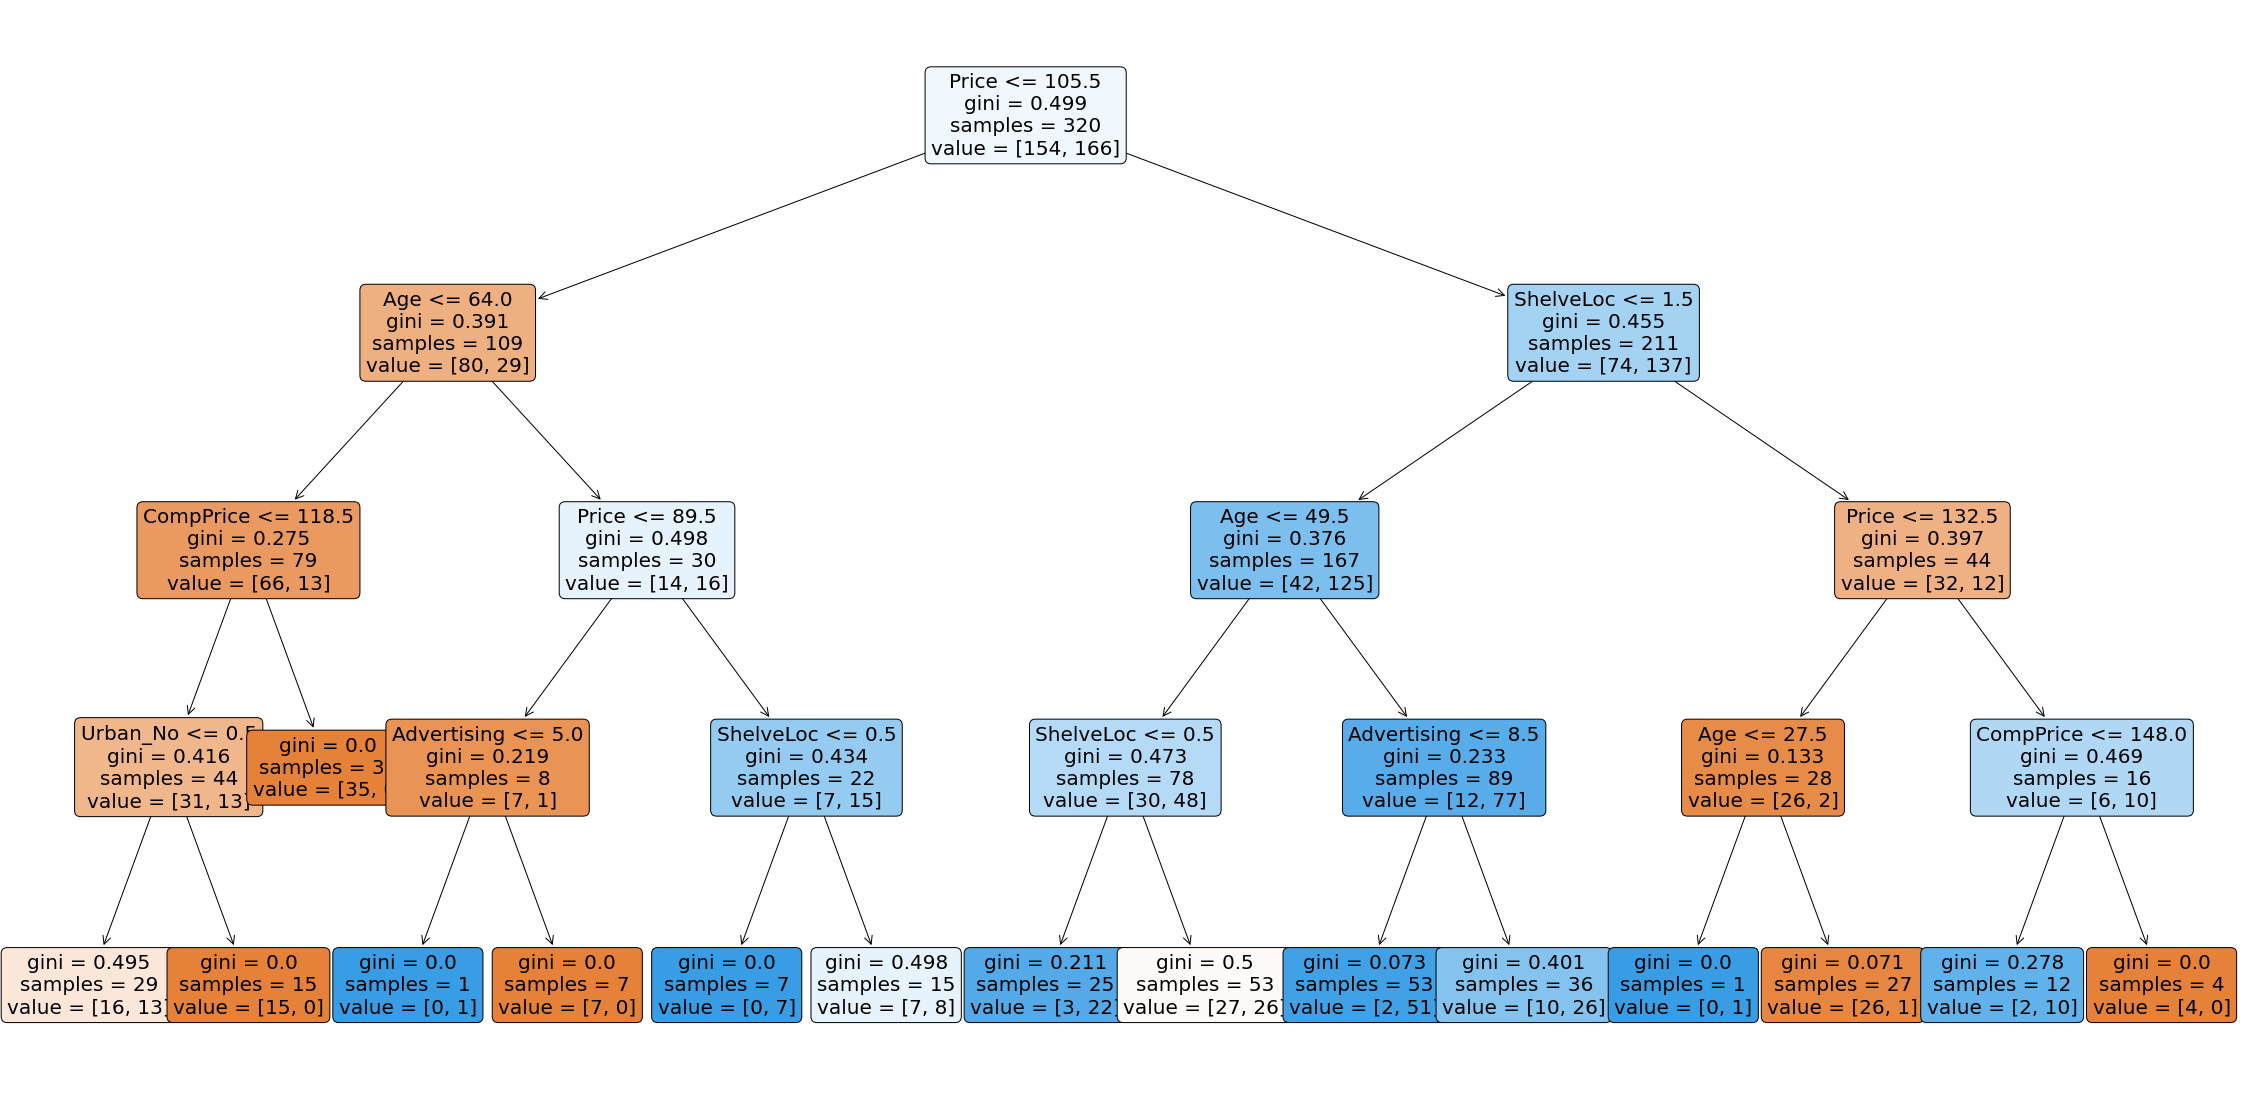

In [50]:
# PLOTTING THE TREE

plt.figure(figsize=(40,20))
tree.plot_tree(dtcg,fontsize=20,filled=True,rounded=True,
               feature_names=['CompPrice','Income','Advertising','Population','Price',
                              'Age','Education','ShelveLoc','Urban_No','Urban_Yes','US_No','US_Yes'])

In [51]:
# PRINTING THE TEXT BASED TREE

print(tree.export_text(dtcg))

|--- feature_4 <= 105.50
|   |--- feature_5 <= 64.00
|   |   |--- feature_0 <= 118.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- class: high
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- class: high
|   |   |--- feature_0 >  118.50
|   |   |   |--- class: high
|   |--- feature_5 >  64.00
|   |   |--- feature_4 <= 89.50
|   |   |   |--- feature_2 <= 5.00
|   |   |   |   |--- class: low
|   |   |   |--- feature_2 >  5.00
|   |   |   |   |--- class: high
|   |   |--- feature_4 >  89.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: low
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: low
|--- feature_4 >  105.50
|   |--- feature_7 <= 1.50
|   |   |--- feature_5 <= 49.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: low
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: high
|   |   |--- feature_5 >  49.50
|   |   |   |--- feature_2 <= 8.50
|   |   |   |   |--- class: low
|   |   |   |--- feature_2 >  8.50
| 

In [52]:
# EXTRACTING FEATURE IMPORTANCES

dtcg.feature_importances_

array([0.09160198, 0.        , 0.05107133, 0.        , 0.37499367,
       0.15597067, 0.        , 0.27828217, 0.04808017, 0.        ,
       0.        , 0.        ])

In [53]:
## PRINTING THE FEATURE IMPORTANCES WITH RESPECT TO FEATURE NAMES

feature_names=['CompPrice','Income','Advertising','Population','Price','Age',
                              'Education','ShelveLoc','Urban_No','Urban_Yes','US_No','US_Yes']
for i,b in enumerate(feature_names):
    print(f'{b}       -   {(dtcg.feature_importances_[i]*100):.2f}')

CompPrice       -   9.16
Income       -   0.00
Advertising       -   5.11
Population       -   0.00
Price       -   37.50
Age       -   15.60
Education       -   0.00
ShelveLoc       -   27.83
Urban_No       -   4.81
Urban_Yes       -   0.00
US_No       -   0.00
US_Yes       -   0.00


## Conclusion

    if price is less than 92.5 and ShelveLoc is greater than 0.5 (meaning atleast medium or good) we are able to classify 39 points as high sale category. 
    
    if price greater than 92.5 and ShelveLoc greater than 1.5 (meaning good) and if the contry is US then the sales are high with 31 points.
    
    The company should focus on these two segments to push more sales. the most important features to focus on are Price, ShelveLoc to improve the sales. 